- Cosine Similarity: Measures the cosine of the angle between two non-zero vectors and is often used for comparing the similarity between documents or high-dimensional vectors.

- Jaccard Similarity: Computes the size of the intersection divided by the size of the union of two sets. It is commonly used for measuring similarity between sets or binary data.

- Euclidean Distance: Calculates the straight-line distance between two points in a multi-dimensional space. It is frequently used for comparing the similarity between numerical vectors.

- Levenshtein Distance: Measures the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into another. It is useful for comparing the similarity or dissimilarity between strings.

- Edit Distance: Similar to Levenshtein Distance, it quantifies the minimum number of operations needed to transform one string into another. It considers insertions, deletions, and substitutions.

- Hamming Distance: Compares two strings of equal length and counts the number of positions at which the corresponding elements are different. It is commonly used for comparing binary strings or strings of fixed length

In [66]:
import numpy as np
import pandas as pd
import json
import pickle
import os

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

In [5]:
data = []

with open('dataset/News_Category_Dataset_v3.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))
        
df = pd.DataFrame(data)

In [6]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [7]:
df.shape

(209527, 6)

In [90]:
# function definition for cloud creation
def create_world_cloud(df, column):

    # Concatenate the text from 'headline', 'category', and 'summary' columns
    #text = ' '.join(df['headline']) + ' ' + ' '.join(df['category']) + ' ' + ' '.join(df['short_description'])
    #text = ' '.join(df['headline'])
    text = df[column].values
    # Create a WordCloud object
    wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=209527, stopwords=STOPWORDS, random_state=2023).generate(str(text))

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{str(column).upper()} Cloud\n")
    plt.show()
    


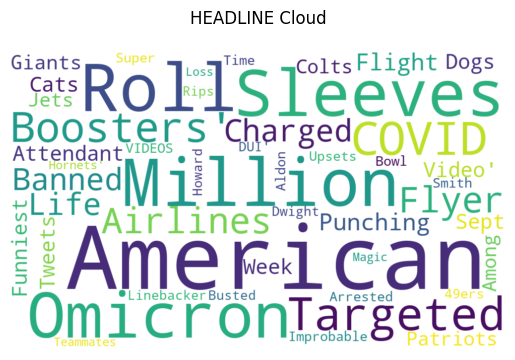

In [91]:
create_world_cloud(df=df, column="headline")

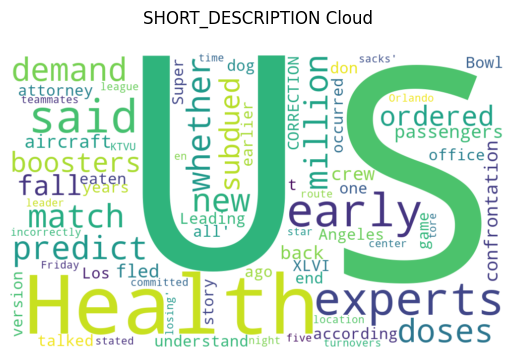

In [92]:
create_world_cloud(df=df, column="short_description")

In [33]:
df['date'] = pd.to_datetime(df['date'])
date_range = pd.date_range(start= df['date'].min(), end= df['date'].max())

print(">>"*15,f"[{df['date'].min()} to {df['date'].max()}]","<<"*15)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> [2012-01-28 00:00:00 to 2022-09-23 00:00:00] <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [8]:
#df = df.head(500)

# Model Building

In [93]:
# Step 2: Preprocess the data (you can customize this based on your requirements)
df['processed_text'] = df['headline'] + ' ' + df['category'] + ' ' + df['short_description']

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(encoding='utf-8', lowercase=True, ngram_range=(1,3))
X = vectorizer.fit_transform(df['processed_text'])


################### Saving Vectorizer ###############

#Save the trained model to a file
#model_filename = 'vectorizer.pkl'

#os.makedirs('artifacts', exist_ok=True)
#file_path =  os.path.join("artifacts", model_filename)

#with open(file_path, 'wb') as file:
#    pickle.dump(vectorizer,file)

#print("Vectorizer saved successfully.")

#######################################################

# Step 4: Calculate cosine similarity
#similarity_matrix = cosine_similarity(X)


# Step 5: Find the most similar data
def find_most_similar_data(query, k=5):
    query_vector = vectorizer.transform([query])
    similarity_scores = cosine_similarity(query_vector, X)
    top_indices = similarity_scores.argsort()[0][::-1][:k]
    
    create_world_cloud(df= df.iloc[top_indices], column="processed_text" )
    return df.iloc[top_indices]

Enter Query String:	 Book


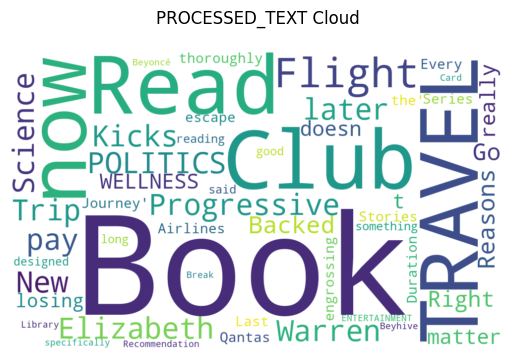


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Book <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
133322,https://www.huffingtonpost.com/entry/pccc-eliz...,Progressive Book Club Kicks Off With Elizabeth...,POLITICS,,Ashley Alman,2014-04-22,Progressive Book Club Kicks Off With Elizabeth...
7502,https://www.huffpost.com/entry/how-you-can-boo...,Here's How You Can Book A Trip For Just $1,TRAVEL,"Book now, pay later.",Brittany Nims,2019-01-04,Here's How You Can Book A Trip For Just $1 TRA...
151172,https://www.huffingtonpost.com/entry/health-be...,6 Science-Backed Reasons To Go Read A Book Rig...,WELLNESS,"""It really doesn't matter what book you read, ...",Laura Schocker,2013-10-12,6 Science-Backed Reasons To Go Read A Book Rig...
164765,https://www.huffingtonpost.com/entry/qantas-ai...,"Qantas Airlines Book Series, 'Stories For Ever...",TRAVEL,There is something to be said for reading a go...,,2013-05-21,"Qantas Airlines Book Series, 'Stories For Ever..."
73202,https://www.huffingtonpost.com/entry/beyonce-b...,Break Out That Library Card Because Beyoncé Ha...,ENTERTAINMENT,The Beyhive book club 🐝,Cole Delbyck,2016-03-09,Break Out That Library Card Because Beyoncé Ha...


In [94]:
# Step 6: Example usage

#### TEST 1
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 MODI


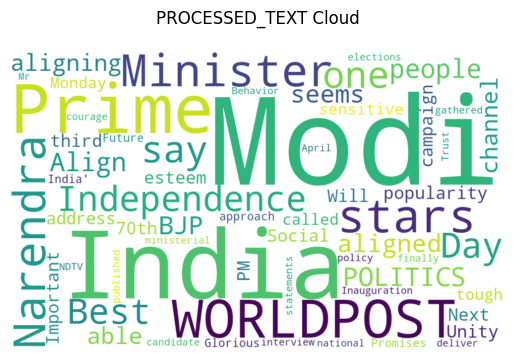


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: MODI <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
130191,https://www.huffingtonpost.com/entry/in-india-...,"In India, Stars Align for Prime Minister Modi",POLITICS,Some people would say the stars aligned for Mo...,"Gunjan Bagla, ContributorManagement consultant...",2014-05-29,"In India, Stars Align for Prime Minister Modi ..."
131317,https://www.huffingtonpost.com/entry/india-ele...,Narendra Modi Will Be India's Next Prime Minister,WORLDPOST,,,2014-05-16,Narendra Modi Will Be India's Next Prime Minis...
59314,https://www.huffingtonpost.comhttp://www.huffi...,"Social Unity Is Most Important, Says PM Modi O...",THE WORLDPOST,"In his third independence day address, Prime M...",,2016-08-15,"Social Unity Is Most Important, Says PM Modi O..."
130513,https://www.huffingtonpost.com/entry/narendra-...,Modi Promises 'Glorious Future For India' At I...,WORLDPOST,,,2014-05-26,Modi Promises 'Glorious Future For India' At I...
131891,https://www.huffingtonpost.com/entry/indias-mo...,India's Modi on His Best Behavior: Can We Trus...,WORLDPOST,"Mr. Narendra Modi, the prime ministerial candi...","Mike Ghouse, ContributorSpeaker, thinker, writ...",2014-05-09,India's Modi on His Best Behavior: Can We Trus...


In [95]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 Rape


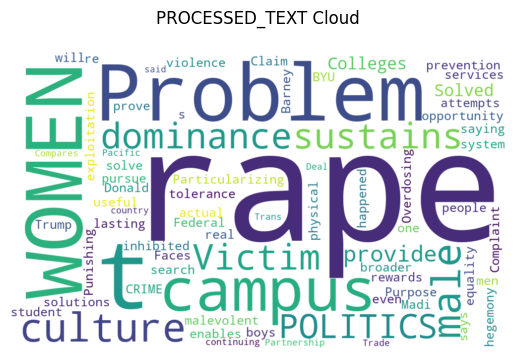


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Rape <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
114184,https://www.huffingtonpost.com/entry/the-colle...,Our 'Rape Problem' Can't Be Solved By Colleges,WOMEN,"Particularizing ""rape on campus"" in the search...","Soraya Chemaly, ContributorFeminist, writer, a...",2014-11-28,Our 'Rape Problem' Can't Be Solved By Colleges...
177733,https://www.huffingtonpost.com/entry/syrian-ra...,Rape Has a Purpose,CRIME,Our attempts to pursue equality and opportunit...,"Soraya Chemaly, Contributor\nWriter",2013-01-05,Rape Has a Purpose CRIME Our attempts to pursu...
53300,https://www.huffingtonpost.com/entry/overdosin...,Overdosing on Rape Culture,WOMEN,,"Courtney M. Soliday, Contributor",2016-10-22,Overdosing on Rape Culture WOMEN
69698,https://www.huffingtonpost.com/entry/byu-title...,BYU Faces Federal Complaint Over Claim It's Pu...,POLITICS,"""They’re saying they can’t prove that a rape h...",Tyler Kingkade,2016-04-19,BYU Faces Federal Complaint Over Claim It's Pu...
63386,https://www.huffingtonpost.com/entry/donald-tr...,Donald Trump Compares Trade Deal To Rape,POLITICS,"He said the Trans-Pacific Partnership was ""jus...",,2016-06-29,Donald Trump Compares Trade Deal To Rape POLIT...


In [96]:
#### TEST 3
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 Data Science


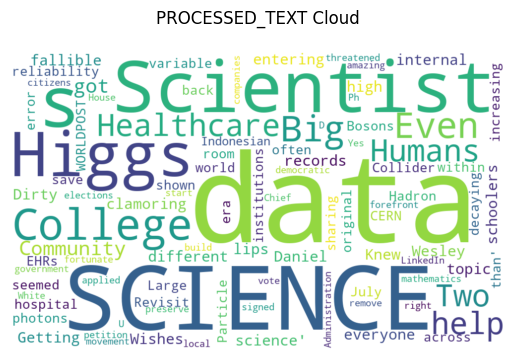


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Data Science <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
30017,https://www.huffingtonpost.com/entry/what-your...,What Your Data Scientist Wishes You Knew,SCIENCE,By Daniel Wesley Big data: It’s the topic on e...,"Young Entrepreneur Council, ContributorInvite-...",2017-07-17,What Your Data Scientist Wishes You Knew SCIEN...
82107,https://www.huffingtonpost.com/entry/getting-d...,Getting Down and Dirty With Big Healthcare Data,SCIENCE,Humans are fallible. Humans entering data into...,"Dr. Timothy Imler, ContributorClinical Informa...",2015-11-29,Getting Down and Dirty With Big Healthcare Dat...
179627,https://www.huffingtonpost.com/entry/two-higgs...,Two Higgs Bosons? CERN Scientists Revisit Larg...,SCIENCE,The original Higgs data from back in July had ...,Jacqueline Howard,2012-12-15,Two Higgs Bosons? CERN Scientists Revisit Larg...
66119,https://www.huffingtonpost.com/entry/how-data-...,How data science can help save the world,WORLDPOST,When the Indonesian government threatened to r...,"Christine Deakers , ContributorWriter, committ...",2016-05-30,How data science can help save the world WORLD...
100362,https://www.huffingtonpost.com/entry/from-comm...,From Community College to the White House Admi...,COLLEGE,I'm the U.S. Chief Data Scientist -- and I got...,"DJ Patil, ContributorU.S. Chief Data Scientist",2015-05-07,From Community College to the White House Admi...


In [97]:
#### TEST 4
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 Taliban Women


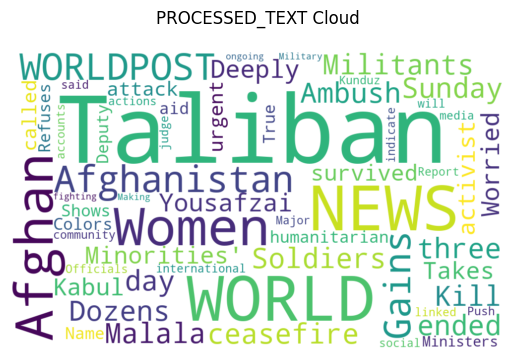


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Taliban Women <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
8555,https://www.huffpost.com/entry/taliban-ambush-...,Taliban Militants Ambush And Kill Dozens Of Af...,WORLD NEWS,The three-day Taliban ceasefire ended on Sunday.,,2018-06-20,Taliban Militants Ambush And Kill Dozens Of Af...
2169,https://www.huffpost.com/entry/malala-yousafza...,"Malala Yousafzai 'Deeply Worried About Women, ...",WORLD NEWS,"The activist, who survived a Taliban attack, c...",Josephine Harvey,2021-08-16,"Malala Yousafzai 'Deeply Worried About Women, ..."
1963,https://www.huffpost.com/entry/afghanistan-cab...,"Taliban Once Again Shows True Colors, Refuses ...",WORLD NEWS,The international community has said that it w...,"Kathy Gannon, AP",2021-09-21,"Taliban Once Again Shows True Colors, Refuses ..."
54931,https://www.huffingtonpost.com/entry/afghan-of...,Afghan Officials Report Major Gains In Kunduz ...,THE WORLDPOST,But social media accounts linked to the Taliba...,,2016-10-04,Afghan Officials Report Major Gains In Kunduz ...
125165,https://www.huffingtonpost.com/entry/taliban-m...,Taliban Making Military Gains In Afghanistan,WORLDPOST,,,2014-07-26,Taliban Making Military Gains In Afghanistan W...


In [100]:
#### TEST 4
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 India Rape Case


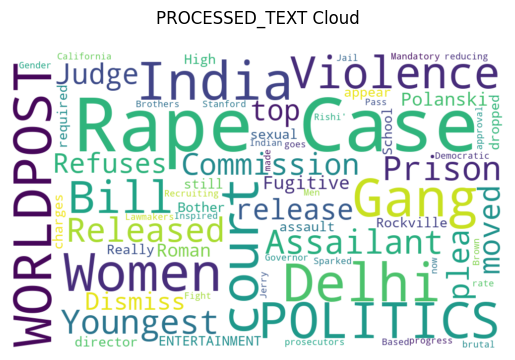


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: India Rape Case <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
80207,https://www.huffingtonpost.com/entry/youngest-...,Youngest Assailant In Delhi Gang Rape Case Rel...,THE WORLDPOST,The Delhi Commission for Women has moved a ple...,,2015-12-20,Youngest Assailant In Delhi Gang Rape Case Rel...
27195,https://www.huffingtonpost.com/entry/roman-pol...,Judge Refuses To Dismiss Rape Case Against Fug...,ENTERTAINMENT,The director is still required to appear in co...,Sara Boboltz,2017-08-19,Judge Refuses To Dismiss Rape Case Against Fug...
36034,https://www.huffingtonpost.com/entry/what-shou...,What Should Really Bother You About The Rockvi...,POLITICS,The sexual assault charges have just been drop...,"Jennifer Rand, ContributorLawyer, political ac...",2017-05-06,What Should Really Bother You About The Rockvi...
49868,https://www.huffingtonpost.com/entry/india-gen...,These Indian Brothers Are Recruiting Men To Fi...,THE WORLDPOST,"Sparked by a brutal gang rape case in 2012, In...","Sutirtha Sahariah, Women & Girls Hub",2016-11-30,These Indian Brothers Are Recruiting Men To Fi...
57965,https://www.huffingtonpost.com/entry/stanford-...,California Lawmakers Pass Mandatory Jail Bill ...,POLITICS,The bill now goes to Democratic Governor Jerry...,"By Dan Whitcomb, Reuters",2016-08-30,California Lawmakers Pass Mandatory Jail Bill ...


In [103]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 US Rape Cases


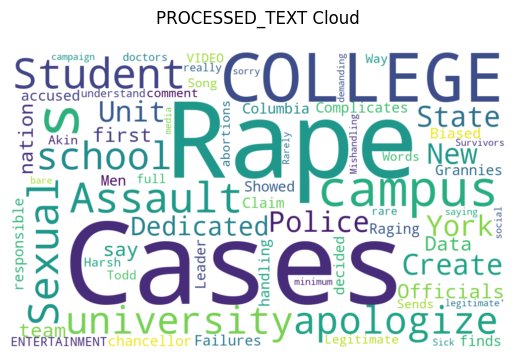


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: US Rape Cases <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
90568,https://www.huffingtonpost.com/entry/new-york-...,New York State Police Create Unit Dedicated To...,COLLEGE,Officials say this is a first-in-the-nation team.,"Katie Reilly, Reuters",2015-08-26,New York State Police Create Unit Dedicated To...
59907,https://www.huffingtonpost.com/entry/columbia-...,Data Complicates Student’s Claim That Columbia...,COLLEGE,The university finds most accused students not...,Tyler Kingkade,2016-08-08,Data Complicates Student’s Claim That Columbia...
85493,https://www.huffingtonpost.com/entry/college-p...,This University Leader Showed How Colleges Sho...,COLLEGE,Why a chancellor decided to apologize for his ...,Tyler Kingkade,2015-10-22,This University Leader Showed How Colleges Sho...
189994,https://www.huffingtonpost.com/entry/raging-gr...,Raging Grannies' 'Legitimate Rape' Song Sends ...,ENTERTAINMENT,Here's his full comment on abortions in rape c...,,2012-08-26,Raging Grannies' 'Legitimate Rape' Song Sends ...
59909,https://www.huffingtonpost.com/entry/college-a...,Colleges Rarely Apologize For Mishandling Rape...,COLLEGE,A social media campaign is demanding that scho...,Tyler Kingkade,2016-08-08,Colleges Rarely Apologize For Mishandling Rape...


In [105]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 India


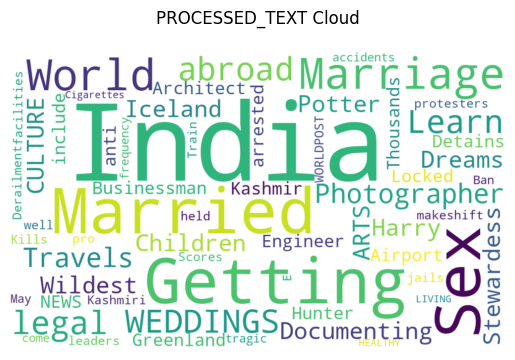


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: India <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
208515,https://www.huffingtonpost.com/entry/getting-m...,Getting Married In India,WEDDINGS,Learn more about getting married abroad here. ...,"Seed, Seed",2012-02-08,Getting Married In India WEDDINGS Learn more a...
140582,https://www.huffingtonpost.com/entry/sofie-kni...,Photographer Travels The World Documenting Chi...,CULTURE & ARTS,Stewardess -- Iceland Harry Potter -- India En...,,2014-02-02,Photographer Travels The World Documenting Chi...
6276,https://www.huffpost.com/entry/india-kashmir-t...,India Detains Thousands In Locked-Down Kashmir,WORLD NEWS,Those arrested include anti-India protesters a...,"Aijaz Hussain, AP",2019-08-21,India Detains Thousands In Locked-Down Kashmir...
50650,https://www.huffingtonpost.com/entry/india-tra...,India Train Derailment Kills Scores,THE WORLDPOST,Such accidents come with a tragic frequency in...,,2016-11-20,India Train Derailment Kills Scores THE WORLDP...
116577,https://www.huffingtonpost.com/entry/india-eci...,India May Ban E-Cigarettes,HEALTHY LIVING,,,2014-10-31,India May Ban E-Cigarettes HEALTHY LIVING


In [106]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 India Pakistan Afganistan China


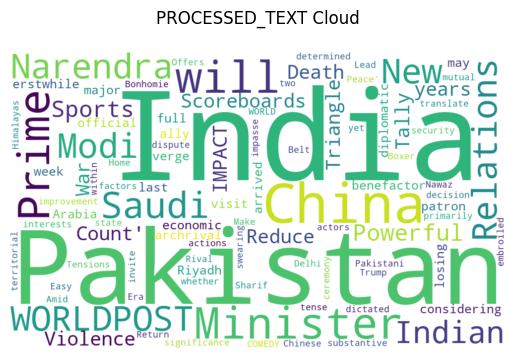


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: India Pakistan Afganistan China <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
106276,https://www.huffingtonpost.com/entry/india-pak...,Powerful Sports Scoreboards Tally War 'Death C...,IMPACT,,Robbie Couch,2015-02-27,Powerful Sports Scoreboards Tally War 'Death C...
71084,https://www.huffingtonpost.com/entry/saudi--in...,Saudi-India-Pakistan Triangle,WORLDPOST,After years of considering Saudi Arabia as a m...,"Aparna Pande, ContributorDirector, India Initi...",2016-04-03,Saudi-India-Pakistan Triangle WORLDPOST After ...
67793,https://www.huffingtonpost.com/entry/make-your...,Make Your Own Trump At Home!,COMEDY,"Easy as China, China, China.",John Trowbridge,2016-05-11,Make Your Own Trump At Home! COMEDY Easy as Ch...
125490,https://www.huffingtonpost.com/entry/will-the-...,Will the Delhi Bonhomie Lead to a New Era in P...,WORLDPOST,It has yet to be determined whether Indian Pri...,"Frank Islam and Ed Crego, Contributors",2014-07-22,Will the Delhi Bonhomie Lead to a New Era in P...
28289,https://www.huffingtonpost.com/entry/india-box...,"Amid China-India Tensions, Indian Boxer Offers...",WORLD NEWS,India and China are embroiled in a tense impas...,Dominique Mosbergen,2017-08-06,"Amid China-India Tensions, Indian Boxer Offers..."


In [111]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 Tennessee Nevada Indiana Mexico


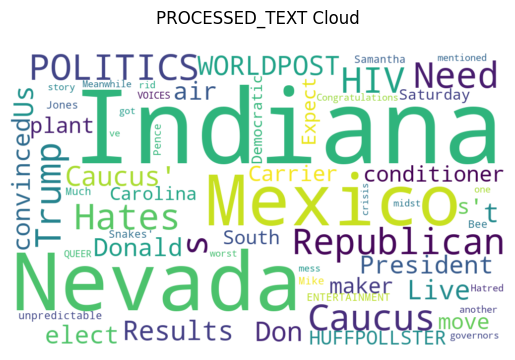


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Tennessee Nevada Indiana Mexico <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
74469,https://www.huffingtonpost.comhttp://elections...,Nevada Republican Caucus Live Results,POLITICS,Nevada Republican Caucus,,2016-02-24,Nevada Republican Caucus Live Results POLITICS...
49653,https://www.huffingtonpost.com/entry/mexico-tr...,"Mexico To Trump: We Don’t Need You, You Need Us",THE WORLDPOST,President-elect Donald Trump has convinced air...,"Ana Campoy, Quartz",2016-12-02,"Mexico To Trump: We Don’t Need You, You Need U..."
74843,https://www.huffingtonpost.com/entry/nevada-so...,HUFFPOLLSTER: Here’s What To Expect In Nevada ...,POLITICS,Nevada’s Democratic caucus is unpredictable.,"Natalie Jackson, Ariel Edwards-Levy, and Janie...",2016-02-19,HUFFPOLLSTER: Here’s What To Expect In Nevada ...
61704,https://www.huffingtonpost.com/entry/samantha-...,Samantha Bee: 'Indiana Hates Mike Pence As Muc...,ENTERTAINMENT,“Congratulations Indiana! You just got rid of ...,David Moye,2016-07-19,Samantha Bee: 'Indiana Hates Mike Pence As Muc...
103709,https://www.huffingtonpost.com/entry/homophobi...,HIV and Hatred in Indiana,QUEER VOICES,"Meanwhile, there is another story out of India...","Dr. Gloria Brame, ContributorAuthor, sex thera...",2015-03-29,HIV and Hatred in Indiana QUEER VOICES Meanwhi...


In [112]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data

Enter Query String:	 Corona Covid-19 


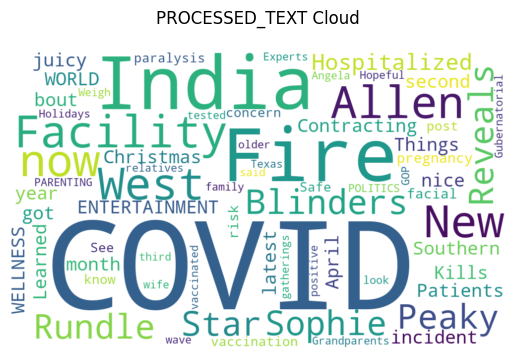


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Top 5 Matches For Entered Query: Corona Covid-19  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


,link,headline,category,short_description,authors,date,processed_text
3512,https://www.huffpost.com/entry/sophie-rundle-p...,'Peaky Blinders' Star Sophie Rundle Reveals Sh...,ENTERTAINMENT,"""For Christmas this year I got myself a nice j...","Daniel Welsh, HuffPost UK",2020-12-23,'Peaky Blinders' Star Sophie Rundle Reveals Sh...
4305,https://www.huffpost.com/entry/fire-kills-pati...,Fire Kills 11 Patients In Southern India COVID...,WORLD NEWS,This the second fire incident at a COVID-19 fa...,"Omer Farooq, AP",2020-08-09,Fire Kills 11 Patients In Southern India COVID...
2798,https://www.huffpost.com/entry/new-things-covi...,5 New Things We Learned About COVID-19 In Apri...,WELLNESS,What's the latest on pregnancy and COVID-19 ri...,Catherine Pearson,2021-04-30,5 New Things We Learned About COVID-19 In Apri...
3854,https://www.huffpost.com/entry/is-it-safe-gran...,Is It Safe To See Grandparents For The Holiday...,PARENTING,The third wave of COVID-19 is here. So what do...,Catherine Pearson,2020-10-26,Is It Safe To See Grandparents For The Holiday...
1862,https://www.huffpost.com/entry/texas-allen-wes...,"Allen West, Texas GOP Gubernatorial Hopeful, H...",POLITICS,"Allen West, who said he did not get vaccinated...",,2021-10-09,"Allen West, Texas GOP Gubernatorial Hopeful, H..."


In [114]:
#### TEST 2
query_data = input("Enter Query String:\t")
most_similar_data = find_most_similar_data(query_data)

print("\n", ">>"*15, f"Top 5 Matches For Entered Query: {query_data}","<<"*15)
most_similar_data
